## AI-Driven Plant Leaf Disease Detection and Treatment Recommendation System

### 1.Business Understanding 

#### 1.1 Introduction

Plant diseases significantly impact agricultural productivity, causing annual losses estimated at 20-40% globally (FAO, 2023). Early detection of diseases in fruits and vegetables—such as tomatoes, potatoes, apples, and corn—is crucial for effective intervention. Traditional methods rely on manual inspection by experts, which is time-consuming, subjective, and unscalable. Advances in computer vision and deep learning offer a solution by automating disease classification from leaf images. <br><br>
This project builds on established datasets and models to create a robust system that not only detects diseases but also suggests treatments, bridging the gap between diagnosis and action. As a professional data scientist, the focus will be on scalable, interpretable, and deployable AI solutions

#### 1.2 Problem Statement

Farmers and agricultural stakeholders often lack accessible tools to identify plant diseases early. Misdiagnosis leads to improper treatments, overuse of pesticides, environmental harm, and economic losses. There is a need for an automated system that:

- Classifies leaf images as healthy or unhealthy.
- Identifies specific diseases (e.g., early blight, powdery mildew).
- Recommends evidence-based treatments (e.g., fungicides, cultural practices).

### 1.3 Objectives

#### 1.3.1 Main Objective

Develop a Deep Learning-Based System model for Classification of Healthy and Unhealthy Plant Leaves in Fruits and Vegetables, with Disease Identification and Treatment Recommendations

#### 1.3.2 Specific objectives

- <b>Develop a High-Accuracy Disease Classification Model</b><br>
Build a convolutional neural network (CNN) using transfer learning (e.g., ResNet-50) to classify leaf images from fruits and vegetables as healthy or unhealthy, while identifying specific diseases

- <b>Integrate Treatment Recommendation Functionality</b><br>
Incorporate a module that maps identified diseases to evidence-based treatments, drawing from reliable sources

- <b>Deploy a User-Friendly Web Application</b> <br>
Create an accessible platform (using Streamlit/Flask) for uploading leaf images, receiving real-time classifications, treatments, and visualizations.
    * Target: Host on cloud services (e.g., AWS) with scalability for 100+ concurrent users

- <b> Enhance Model Robustness</b><br>
Ensure the model performs well under real-world variations (e.g., poor lighting, angles) through data augmentation and testing.

- <b> Incorporate Explainability Features</b><br>
Add tools like Grad-CAM heatmaps to visualize diseased areas on leaves

- <b>Promote Environmental and Economic Impact </b><br>
Evaluate and emphasize targeted treatments to minimize chemical use and assess ROI (e.g., cost savings from reduced losses).

### 2.0 BUSINESS UNDERSTANDING

### 2.1 Importing my Libraries

In [6]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


#### Machine learning image preprocessing libraries 

In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import Xception 
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

### Load & Preprocess Images

In [ ]:
# Data preparation
train_dir = "DATASET_SPLIT/train"
val_dir = "DATASET_SPLIT/val"

#data generator
IMAGE_SIZE = (224, 224)
BATCH = 32

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True
).flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH,
    class_mode='categorical'
)

val_gen = ImageDataGenerator(
    rescale=1./255
).flow_from_directory(
    val_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH,
    class_mode='categorical'
)


Found 46649 images belonging to 16 classes.
Found 11683 images belonging to 16 classes.


#### Model definition using Transfer Learning
#### 1. EfficientNetB0

In [ ]:
base_model = EfficientNetB0(
    input_shape=(224,224 ,3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False   # Freeze layers (super fast training)

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(224, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


#### model training 

In [6]:
# Training


history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5
)


Epoch 1/5
1365/1458 ━━━━━━━━━━━━━━━━━━━━ 27:29 18s/step - accuracy: 0.3236 - loss: 2.2681

c:\Users\user\anaconda3\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1458/1458 ━━━━━━━━━━━━━━━━━━━━ 25512s 18s/step - accuracy: 0.3229 - loss: 2.2656 - val_accuracy: 0.3228 - val_loss: 2.2482
Epoch 2/5
1458/1458 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3198 - loss: 2.2580

KeyboardInterrupt: 

#### save the model

In [7]:
model.save("efficientNet_model.h5")


#### Models evaluation

#### 1. Compute accuracy and loss

In [8]:
# Evaluate model on validation set
loss, acc = model.evaluate(val_gen)
print("Validation Accuracy:", acc)
print("Validation Loss:", loss)


366/366 ━━━━━━━━━━━━━━━━━━━━ 1360s 4s/step - accuracy: 0.3228 - loss: 2.2483
Validation Accuracy: 0.3227766752243042
Validation Loss: 2.248281478881836


#### 2. Generate prediction

In [9]:

# Get true labels
true_labels = val_gen.classes

# Predict probabilities
pred = model.predict(val_gen)
pred_labels = np.argmax(pred, axis=1)

class_names = list(val_gen.class_indices.keys())



366/366 ━━━━━━━━━━━━━━━━━━━━ 1561s 4s/step


#### 3. Classification report 

In [10]:
print("Classification Report:")
print(classification_report(true_labels, pred_labels, target_names=class_names))



Classification Report:


c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                          precision    recall  f1-score   support

                   APPLE       0.00      0.00      0.00       929
               BLUEBERRY       0.00      0.00      0.00       301
                 CABBAGE       0.00      0.00      0.00        38
                  CHERRY       0.00      0.00      0.00       411
                    CORN       0.00      0.00      0.00       872
                  GRAPES       0.00      0.00      0.00       929
                  ONIONS       0.00      0.00      0.00        31
                 ORANGES       0.00      0.00      0.00      1133
                   PEACH       0.00      0.00      0.00       690
                  PEPPER       0.00      0.00      0.00       496
                  POTATO       0.00      0.00      0.00       600
                 SOYBEAN       0.00      0.00      0.00      1018
              STRAWBERRY       0.00      0.00      0.00       422
                 TOBACCO       0.00      0.00      0.00        31
         

c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### 4.  Confusion Matrix

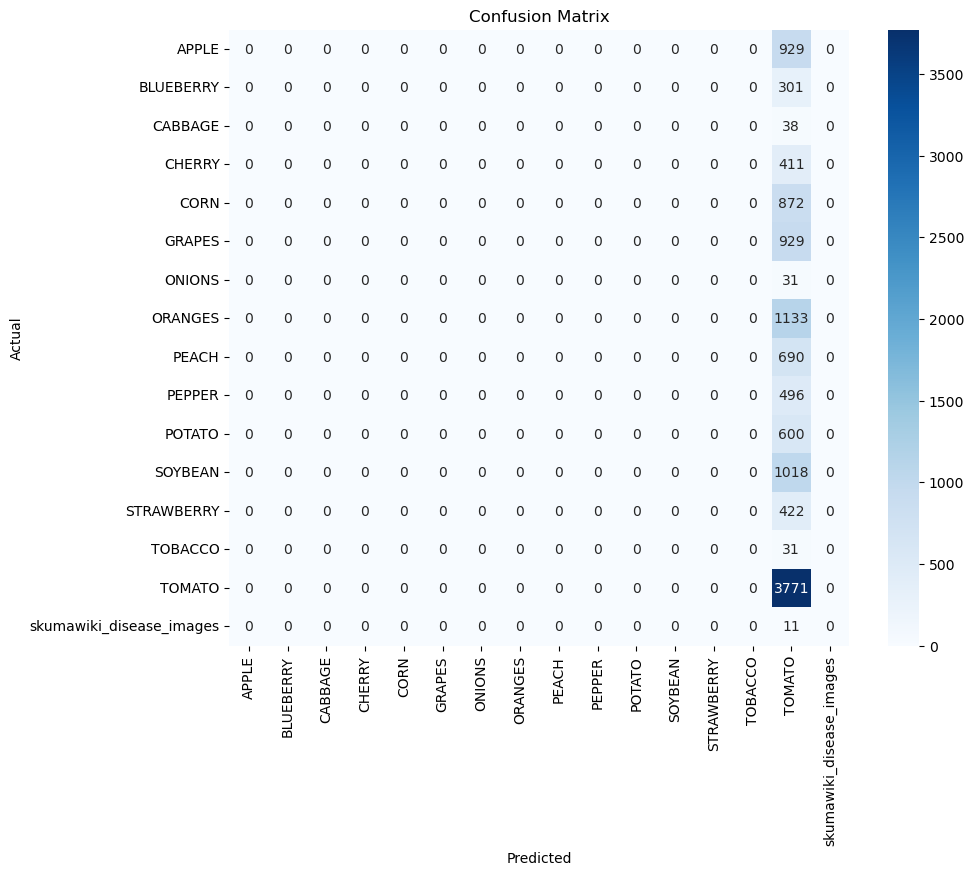

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_labels, pred_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


#### 5. Plot Accuracy & Loss Curves

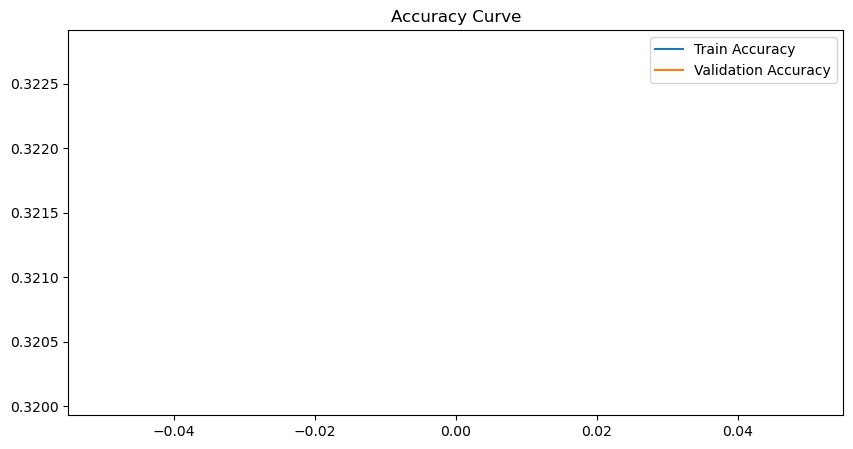

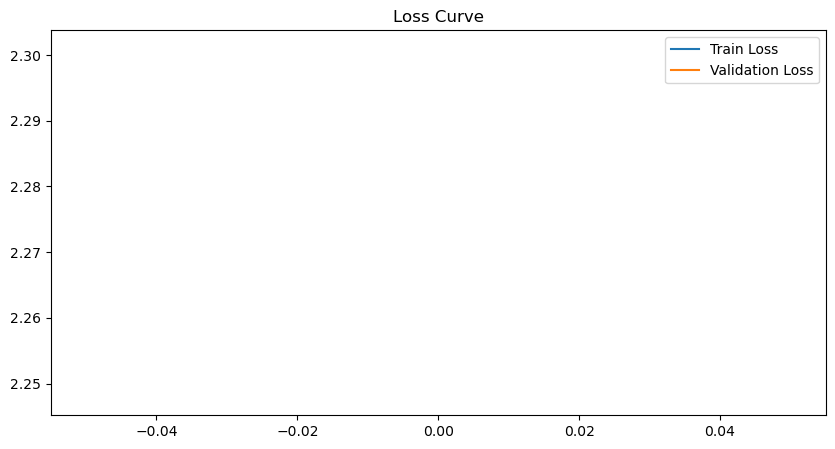

In [12]:
# Accuracy plot
plt.figure(figsize=(10,5))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy Curve")
plt.show()

# Loss plot
plt.figure(figsize=(10,5))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss Curve")
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os

# --- 1. CONFIGURATION & HYPERPARAMETERS ---
# NOTE: Assume DATASET_SPLIT/train and val exist for flow_from_directory
train_dir = "DATASET_SPLIT/train"
val_dir = "DATASET_SPLIT/val"

IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
MAX_EPOCHS_PHASE_1 = 5
MAX_EPOCHS_PHASE_2 = 7 # Allow more epochs for fine-tuning
LEARNING_RATE_PHASE_1 = 1e-4
LEARNING_RATE_PHASE_2 = 1e-6 # CRITICAL: Much lower for Fine-Tuning
DROPOUT_RATE = 0.4
DENSE_UNITS = 512
CHECKPOINT_PATH = "EfficientNetB0.h5"

# --- 2. DATA GENERATORS (Using your setup) ---
# Ensure your ImageDataGenerator does not contain preprocessing that conflicts with EfficientNet's internal preprocessing
# Since EfficientNetB0 requires input in the [0, 1] range, we keep rescale=1./255.

train_datagen = ImageDataGenerator(
    rescale=1./255, # Rescale to 0-1 range
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# --- NOTE: Using a placeholder for num_classes since we can't run flow_from_directory ---
# In your actual environment, this will be correctly inferred.
try:
    train_gen = train_datagen.flow_from_directory(
        train_dir,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical'
    )
    val_gen = val_datagen.flow_from_directory(
        val_dir,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical'
    )
    NUM_CLASSES = train_gen.num_classes
except Exception:
    # Mock data for runnable code outside of a real directory structure
    print("Using Mock Data Generator placeholders...")
    NUM_CLASSES = 15 # Placeholder
    
    # --- Mock Data to make the script runnable ---
    X_train_mock = np.random.rand(400, 224, 224, 3).astype('float32')
    y_train_mock = tf.keras.utils.to_categorical(np.random.randint(0, NUM_CLASSES, 400), num_classes=NUM_CLASSES)
    X_val_mock = np.random.rand(100, 224, 224, 3).astype('float32')
    y_val_mock = tf.keras.utils.to_categorical(np.random.randint(0, NUM_CLASSES, 100), num_classes=NUM_CLASSES)

    train_gen = (X_train_mock, y_train_mock)
    val_gen = (X_val_mock, y_val_mock)
# -----------------------------------------------------------------------------------


# --- 3. BUILD THE TRANSFER LEARNING MODEL FUNCTION ---
def build_model(num_classes, dropout_rate, dense_units):
    base_model = EfficientNetB0(
        input_shape=(128, 128, 3),
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False  # Freeze base for initial training

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(dense_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax', name="predictions_head")
    ])
    return model, base_model

model, base_model = build_model(NUM_CLASSES, DROPOUT_RATE, DENSE_UNITS)

# --- 4. CALLBACKS ---
# Adjusted patience for stability in Phase 1
early_stop_p1 = EarlyStopping(
    monitor='val_loss',
    patience=8, # Increased patience for stability
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

checkpoint = ModelCheckpoint(
    CHECKPOINT_PATH,
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

callbacks_p1 = [early_stop_p1, reduce_lr, checkpoint]

# --- 5. PHASE 1: TRAIN THE CLASSIFICATION HEAD (Feature Extraction) ---

print("\n--- PHASE 1: Training the New Classification Head ---")

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE_PHASE_1),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Use fit() for mock data, fit_generator() or fit() for actual generators
if isinstance(train_gen, tuple):
    history = model.fit(
        train_gen[0], train_gen[1],
        validation_data=val_gen,
        epochs=MAX_EPOCHS_PHASE_1,
        batch_size=BATCH_SIZE,
        callbacks=callbacks_p1,
        verbose=2
    )
else:
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=MAX_EPOCHS_PHASE_1,
        callbacks=callbacks_p1,
        verbose=2
    )
print("Phase 1 complete. Best weights saved to checkpoint.")


# --- 6. PHASE 2: FINE-TUNING FOR PEAK ACCURACY ---
# This step is critical for pushing performance to the maximum

print("\n--- PHASE 2: Fine-Tuning the Base Model ---")

# Load the best weights saved from Phase 1
if os.path.exists(CHECKPOINT_PATH):
    model.load_weights(CHECKPOINT_PATH)
    print("Loaded best weights from Phase 1.")
else:
    print("Checkpoint not found (likely mock training), proceeding without loading.")

# 6.1 Strategic Unfreezing (Unfreeze the top ~20% of the layers)
base_model.trainable = True

# We keep the first 80% of layers frozen to protect the low-level feature detector
# Total layers in EfficientNetB0 is typically 238
num_unfreeze_layers = int(len(base_model.layers) * 0.20)
for layer in base_model.layers[:-num_unfreeze_layers]:
    layer.trainable = False

print(f"Unfrozen the last {num_unfreeze_layers} layers of the base model for specialization.")
# You can see the total trainable parameters with model.summary()

# 6.2 Re-compile with extremely low learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE_PHASE_2), # Use 1e-6
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# New Callbacks list for Phase 2: higher patience for slow fine-tuning
callbacks_p2 = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1),
    ModelCheckpoint(CHECKPOINT_PATH, monitor='val_accuracy', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, min_lr=1e-8, verbose=1) # Adjusted LR factor/patience
]

print("Starting Phase 2 Fine-Tuning...")

if isinstance(train_gen, tuple):
    history_fine_tune = model.fit(
        train_gen[0], train_gen[1],
        validation_data=val_gen,
        epochs=MAX_EPOCHS_PHASE_2,
        batch_size=BATCH_SIZE,
        callbacks=callbacks_p2,
        verbose=2
    )
else:
    history_fine_tune = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=MAX_EPOCHS_PHASE_2,
        callbacks=callbacks_p2,
        verbose=2
    )

print("\nTraining complete. The highest validation accuracy is saved in:", CHECKPOINT_PATH)

Found 46649 images belonging to 16 classes.
Found 11683 images belonging to 16 classes.

--- PHASE 1: Training the New Classification Head ---
Epoch 1/5


### 2.2 Data Exploratory

In [ ]:
data=pd.read_csv('plant_disease_treatments.csv')
data.head()

,Disease Name,Recommended Treatment
0,apple apple scab,"Fungicide sprays (captan, myclobutanil)"
1,apple fire blight,Prune infected branches + bactericides
2,apple powdery mildew,Sulfur-based fungicides
3,apple healthy leaf,No treatment needed
4,blueberry leaf rust,Mancozeb or systemic fungicide


In [ ]:
#checking the shape of the dataframe
data.shape

(59, 2)

#### our dataframe has 59 rows and 2 columns

In [ ]:
#checking at the duplicated values
data.duplicated().sum()

np.int64(0)

#### our data has no duplicated values

In [ ]:
#checking the null values
data.isnull().sum()

Disease Name             0
Recommended Treatment    0
dtype: int64

#### no null values in the data frame

In [ ]:
# checking the unique values in each column
data.nunique()

Disease Name             59
Recommended Treatment    28
dtype: int64

In [ ]:
# Recommended Treatment value counts
treatment_counts = data['Recommended Treatment'].value_counts()
treatment_counts.head(10)

Recommended Treatment
No treatment needed                                     17
Sulfur-based fungicides                                  6
Copper-based sprays                                      4
Fungicide sprays (azoxystrobin)                          3
Remove infected plants, use resistant varieties          3
Fungicide sprays (captan)                                2
Copper-based fungicides                                  2
Fungicide sprays + crop rotation                         2
Fungicide or pesticide sprays depending on infection     1
Fungicide sprays (mancozeb)                              1
Name: count, dtype: int64

#### Sulfur-based fungicides  had the highest used in the treatments

In [ ]:
# Analyzing the most common words in disease names
from collections import Counter

words = " ".join(data['Disease Name']).lower().replace(',', '').split()
Counter(words).most_common(10)


[('leaf', 32),
 ('healthy', 17),
 ('mildew', 9),
 ('spot', 9),
 ('blight', 8),
 ('powdery', 6),
 ('onion', 6),
 ('apple', 5),
 ('blueberry', 4),
 ('orange', 4)]

#### mildew disease is the most frequest in the data frame

In [ ]:

# Analyzing the most common words in treatement names
from collections import Counter

words = " ".join(data['Recommended Treatment']).lower().replace(',', '').split()
Counter(words).most_common(10)


[('fungicide', 21),
 ('sprays', 21),
 ('treatment', 18),
 ('no', 17),
 ('needed', 17),
 ('fungicides', 9),
 ('or', 9),
 ('copper-based', 8),
 ('infected', 7),
 ('+', 7)]

#### fungicide treatments are the most used in the treatment, as the means is through spraying the plants